In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

A1. For the data table provided below, calculate the entropy associated with each attribute / feature 
at the root node. Using this information, identify the first feature that you’d select for constructing 
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.

In [3]:
import pandas as pd
import math

data=pd.DataFrame({
'age':['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', 
'<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
'income':['high', 'high', 'high', 'medium', 'low', 'low', 'low', 
'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
'student':['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 
'yes', 'yes', 'yes', 'no', 'yes', 'no'],
'credit_rating':['fair', 'excellent', 'fair', 'fair', 'fair', 
'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 
'excellent', 'fair', 'excellent'],
'buys_computer':['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 
'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})
data['age'], _=pd.factorize(data['age'])
data['income'], _=pd.factorize(data['income'])
data['student'], _=pd.factorize(data['student'])
data['credit_rating'], _=pd.factorize(data['credit_rating'])
data['buys_computer'], _=pd.factorize(data['buys_computer'])
X=data.drop('buys_computer', axis=1)
y=data['buys_computer']
mutual_info=mutual_info_classif(X, y)
entropy=[]
for i in range(len(X.columns)):
    values=X.iloc[:,i].value_counts().values
    total=sum(values)
    entropy.append(sum([-x/total*math.log2(x/total) for x in values]))
    print("Entropy of", X.columns[i], ":", entropy[i])
information_gain=[x/y for x, y in zip(mutual_info, entropy)]
print("Information gain:",information_gain)
first_feature=X.columns[information_gain.index(max(information_gain))]
print("First feature for constructing the decision tree:",first_feature)
best_feature_info_gain = X.columns[information_gain.index(max(information_gain))]
print(f"The root node identified using Information Gain is '{best_feature_info_gain}' with Information Gain of {max(information_gain)}")


Entropy of age : 1.5774062828523454
Entropy of income : 1.5566567074628228
Entropy of student : 1.0
Entropy of credit_rating : 0.9852281360342516
Information gain: [0.0, 0.0, 0.2554738911881762, 0.0]
First feature for constructing the decision tree: student
The root node identified using Information Gain is 'student' with Information Gain of 0.2554738911881762


A2.  Create a Decision Tree for the above data. Get the depth of the constructed tree.

In [4]:
model=DecisionTreeClassifier()
model.fit(X, y)
acc=model.score(X,y)
print("Training set acuracy:",acc)
print("Depth of constructed tree is:",model.get_depth())

Training set acuracy: 1.0
Depth of constructed tree is: 4


A3.Visualize the constructed tree with plot_tree() command. Following code snippet for help.

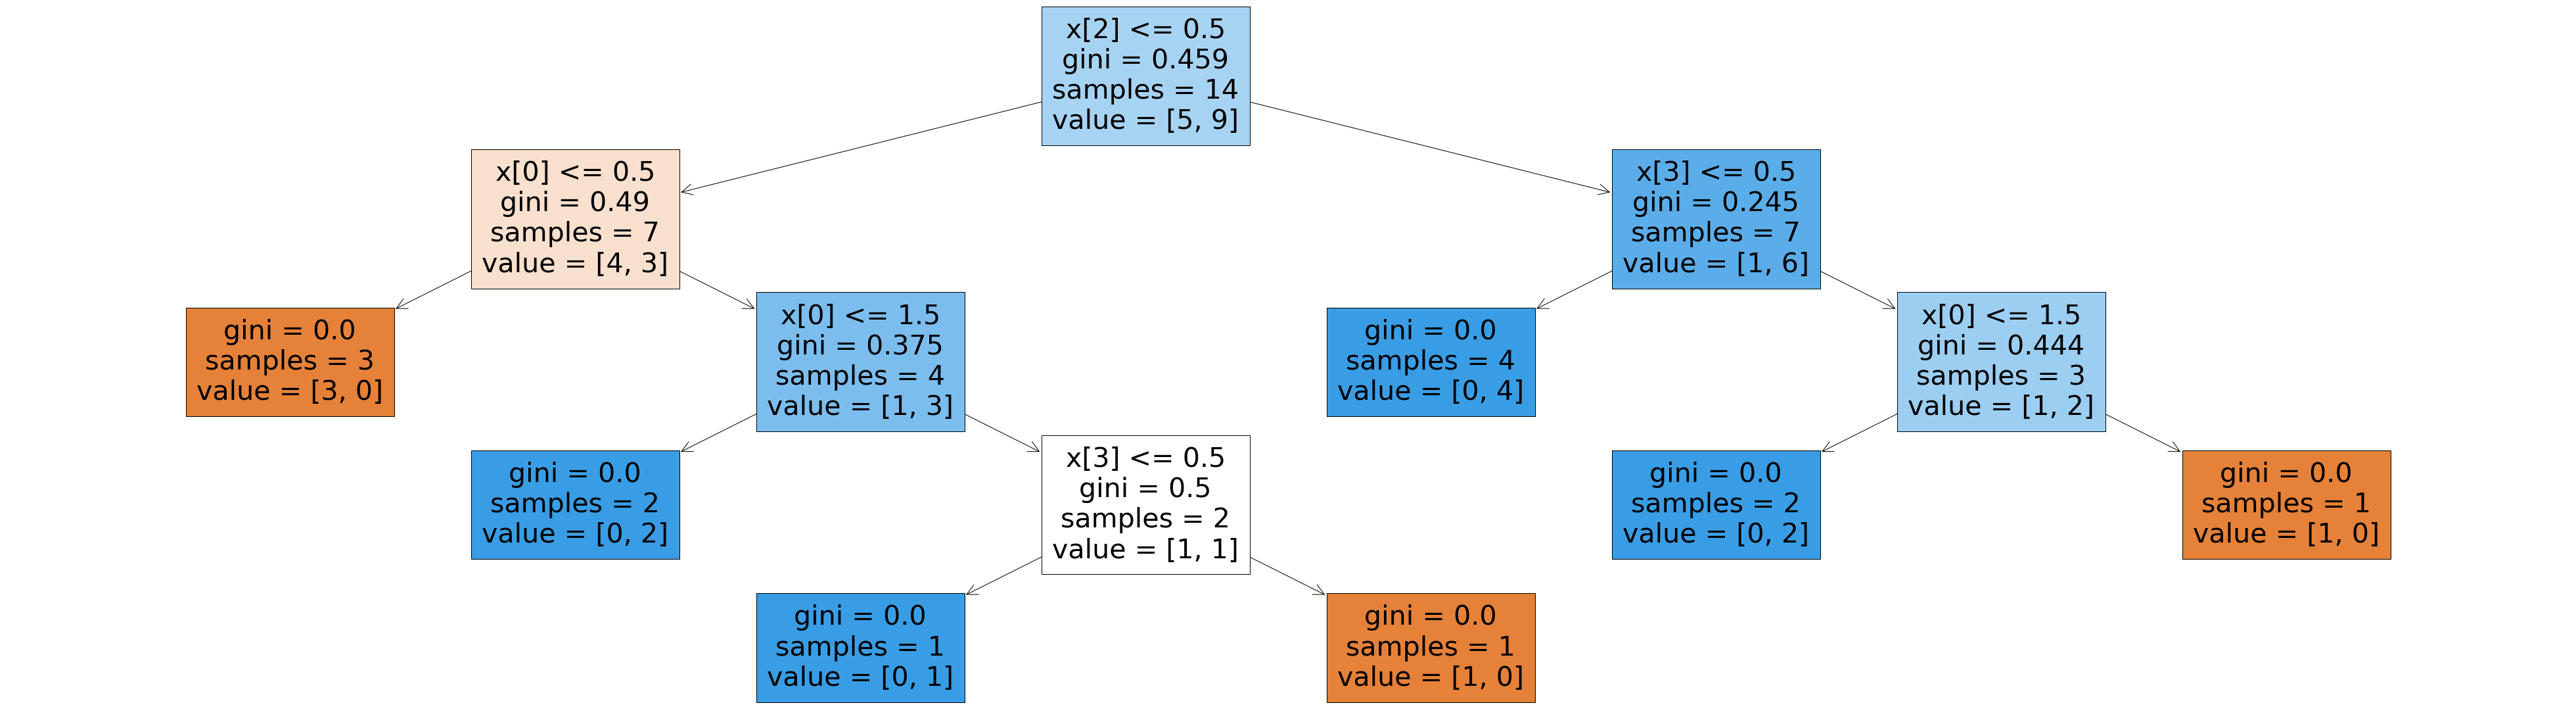

In [41]:
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

#  Project 

In [5]:
data = pd.read_csv('rideshare_kaggle.csv').sample(n=10000, random_state=42)
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
441132,ad4dc1c8-74e4-4018-aefe-be4e4b8e1ee5,1.545085e+09,22,17,12,17-12-2018 22:20,America/New_York,Northeastern University,Theatre District,Uber,...,0.0184,1545066000,34.25,1545044400,41.35,1545076800,28.40,1545044400,35.88,1545076800
274010,47547461-f88b-4c14-9920-1d4a79e7025f,1.543366e+09,0,28,11,28-11-2018 00:48,America/New_York,Northeastern University,Theatre District,Lyft,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
532981,45fba16d-75f1-4e10-bbb7-614f7f1624ae,1.543701e+09,21,1,12,01-12-2018 21:57,America/New_York,Beacon Hill,North End,Uber,...,0.0000,1543683600,30.17,1543662000,44.11,1543690800,25.87,1543662000,43.44,1543690800
428480,79ff5573-1bd4-406d-91c3-5e9b2b60d2b2,1.544794e+09,13,14,12,14-12-2018 13:20,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600
194181,80e33aa2-c291-41f0-b88d-adb3616bf154,1.544851e+09,5,15,12,15-12-2018 05:20,America/New_York,North End,West End,Lyft,...,0.0074,1544893200,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449904,53b681ff-dc05-48a8-a58a-e6b4ed222690,1.543824e+09,7,3,12,03-12-2018 07:53,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
603008,32138813-7bfa-4672-aebe-4a5cb84de25f,1.543732e+09,6,2,12,02-12-2018 06:23,America/New_York,North End,Back Bay,Uber,...,0.0956,1543770000,36.10,1543726800,50.37,1543784400,35.88,1543748400,49.70,1543784400
68501,8cee7940-261e-4e7a-b713-b58a8fb9fdd3,1.543407e+09,12,28,11,28-11-2018 12:11,America/New_York,Financial District,Boston University,Uber,...,0.0000,1543420800,33.83,1543399200,42.61,1543438800,30.13,1543399200,36.60,1543438800
407501,ae49d4f5-e45b-4884-b92a-5619601e4f2f,1.543812e+09,4,3,12,03-12-2018 04:48,America/New_York,South Station,Beacon Hill,Uber,...,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000


In [6]:
target_attribute = 'destination'

In [7]:
# Separating the features (X) and the new target variable (y)
X = data.drop(target_attribute, axis=1)  # Features
y = data[target_attribute]  # New target variable

In [8]:
# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Encoded Target Variable (y):")
print(y)

Encoded Target Variable (y):
[10 10  6 ...  2  1  7]


In [9]:
# Identifying categorical columns in the feature set
categorical_columns = X.select_dtypes(include=['object']).columns

print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['id', 'datetime', 'timezone', 'source', 'cab_type', 'product_id',
       'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


In [10]:
y = data['Loan_Status']
X = data.drop(columns=['Loan_Status'])
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)



KeyError: 'Loan_Status'

In [8]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("\nShapes of Train and Test Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shapes of Train and Test Data:
X_train shape: (8000, 14651)
X_test shape: (2000, 14651)


A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test 
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code 
for help.

In [9]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

print("\nDecision Tree Classifier:")
print(clf)


Decision Tree Classifier:
DecisionTreeClassifier()


In [10]:
# Making predictions on training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [11]:
# Calculate accuracy for training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision for training and test data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Calculate recall for training and test data
recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Calculate F1-score for training and test data
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Calculate AUROC for test data (requires probability scores)
y_test_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, y_test_prob, average='weighted', multi_class='ovr')

# Output the individual performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy on Training Data: {accuracy_train:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")
print(f"Precision on Training Data: {precision_train:.2f}")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Training Data: {recall_train:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")
print(f"F1-score on Training Data: {f1_score_train:.2f}")
print(f"F1-score on Test Data: {f1_score_test:.2f}")
print(f"AUROC on Test Data: {auroc_test:.2f}")


Performance Metrics:
Accuracy on Training Data: 0.94
Accuracy on Test Data: 0.84
Precision on Training Data: 0.94
Precision on Test Data: 0.84
Recall on Training Data: 0.94
Recall on Test Data: 0.84
F1-score on Training Data: 0.94
F1-score on Test Data: 0.84
AUROC on Test Data: 0.94



Plotting Decision Tree:


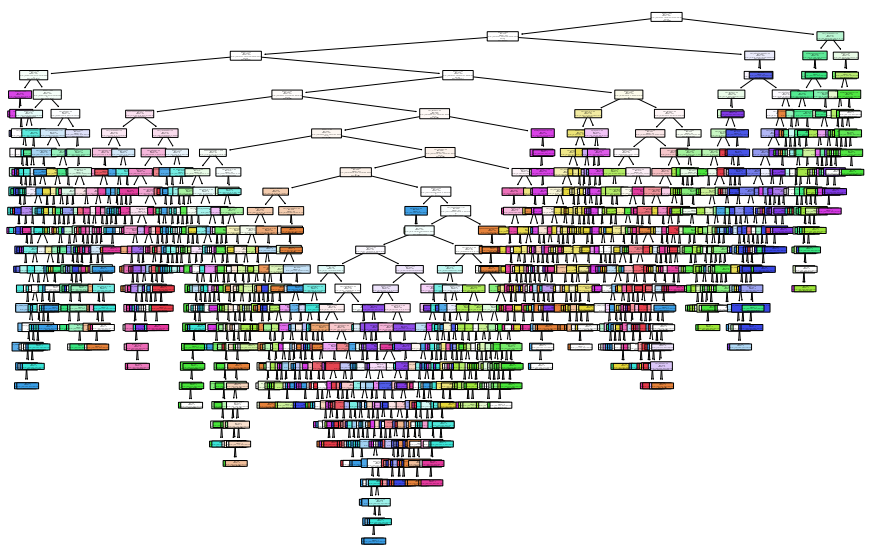

In [53]:
print("\nPlotting Decision Tree:")
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X_encoded.columns, class_names=[str(cls) for cls in label_encoder.classes_], filled=True, rounded=True)
plt.show()

In [12]:
# Generating classification report to get performance metrics for the Decision Tree
classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)


print("Classification Report for Decision Tree:")
print(classification_rep)

print("Actual Maximum Depth of the Tree:", clf.tree_.max_depth)


Classification Report for Decision Tree:
                         precision    recall  f1-score   support

               Back Bay       0.85      0.85      0.85       176
            Beacon Hill       0.86      0.86      0.86       173
      Boston University       0.86      0.81      0.84       169
                 Fenway       0.78      0.80      0.79       167
     Financial District       0.90      0.85      0.87       165
       Haymarket Square       0.79      0.85      0.82       172
              North End       0.74      0.71      0.72       163
          North Station       0.85      0.90      0.88       153
Northeastern University       0.88      0.89      0.89       178
          South Station       0.86      0.83      0.84       144
       Theatre District       0.89      0.94      0.91       174
               West End       0.87      0.82      0.84       166

               accuracy                           0.84      2000
              macro avg       0.84      0.84   

A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the 
accuracies. Visualize the tree constructed with max_depth constraint.
model = DecisionTreeClassifier(max_depth=5)

In [14]:
# Creating a Decision Tree classifier with max_depth constraint
clf = DecisionTreeClassifier(max_depth=6)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [15]:
# Making predictions on training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [16]:
# Calculate accuracy for training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision for training and test data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Calculate recall for training and test data
recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Calculate F1-score for training and test data
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Calculate AUROC for test data (requires probability scores)
y_test_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, y_test_prob, average='weighted', multi_class='ovr')

# Output the individual performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy on Training Data: {accuracy_train:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")
print(f"Precision on Training Data: {precision_train:.2f}")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Training Data: {recall_train:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")
print(f"F1-score on Training Data: {f1_score_train:.2f}")
print(f"F1-score on Test Data: {f1_score_test:.2f}")
print(f"AUROC on Test Data: {auroc_test:.2f}")


Performance Metrics:
Accuracy on Training Data: 0.43
Accuracy on Test Data: 0.41
Precision on Training Data: 0.61
Precision on Test Data: 0.59
Recall on Training Data: 0.43
Recall on Test Data: 0.41
F1-score on Training Data: 0.46
F1-score on Test Data: 0.44
AUROC on Test Data: 0.86


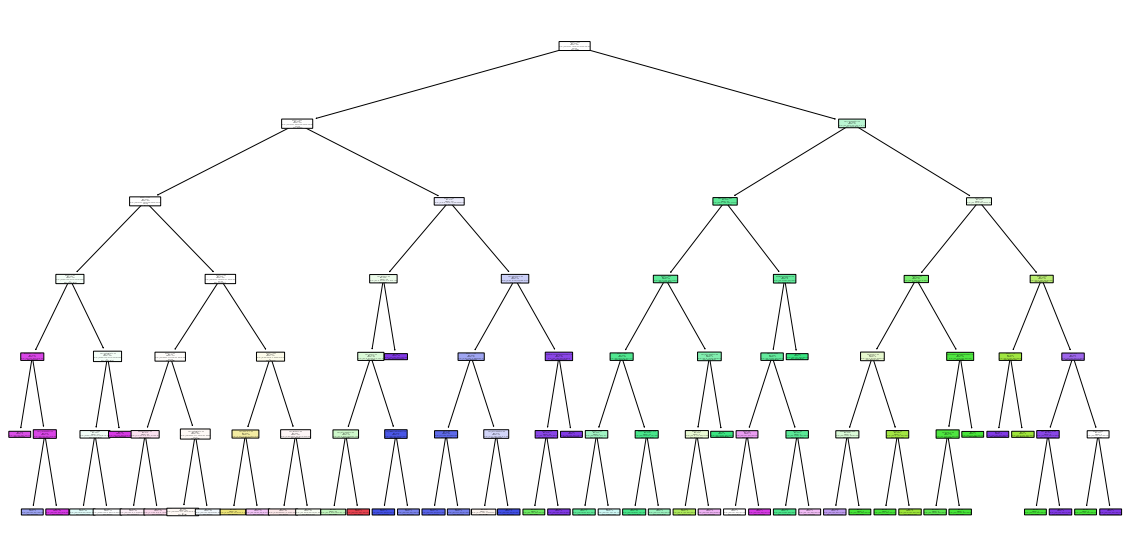

In [59]:
# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_encoded.columns, class_names=[str(cls) for cls in label_encoder.classes_], filled=True, rounded=True)
plt.show()

In [17]:
# Generating classification report to get performance metrics
y_test_pred = clf.predict(X_test)
classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

print("Classification Report for Decision Tree with Max Depth Constraint:")
print(classification_rep)

print("Actual Maximum Depth of the Tree:", clf.tree_.max_depth)



Classification Report for Decision Tree with Max Depth Constraint:
                         precision    recall  f1-score   support

               Back Bay       0.21      0.72      0.33       176
            Beacon Hill       0.74      0.44      0.55       173
      Boston University       0.63      0.43      0.51       169
                 Fenway       0.93      0.31      0.46       167
     Financial District       0.91      0.36      0.52       165
       Haymarket Square       0.34      0.27      0.30       172
              North End       0.23      0.26      0.24       163
          North Station       0.78      0.42      0.54       153
Northeastern University       0.97      0.40      0.57       178
          South Station       0.74      0.42      0.54       144
       Theatre District       0.33      0.39      0.36       174
               West End       0.31      0.55      0.39       166

               accuracy                           0.41      2000
              macro a

6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study 
the model & graph. Find the differences between the default criterion and entropy criterion. Refer 
code below for criterion.
DecisionTreeClassifier(criterion="entropy")


In [13]:
# Creating a Decision Tree classifier with "entropy" criterion
clf = DecisionTreeClassifier(criterion="entropy")

# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
# Making predictions on training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [15]:
# Calculate accuracy for training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision for training and test data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Calculate recall for training and test data
recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Calculate F1-score for training and test data
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Calculate AUROC for test data (requires probability scores)
y_test_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, y_test_prob, average='weighted', multi_class='ovr')

# Output the individual performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy on Training Data: {accuracy_train:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")
print(f"Precision on Training Data: {precision_train:.2f}")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Training Data: {recall_train:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")
print(f"F1-score on Training Data: {f1_score_train:.2f}")
print(f"F1-score on Test Data: {f1_score_test:.2f}")
print(f"AUROC on Test Data: {auroc_test:.2f}")


Performance Metrics:
Accuracy on Training Data: 0.92
Accuracy on Test Data: 0.83
Precision on Training Data: 0.92
Precision on Test Data: 0.83
Recall on Training Data: 0.92
Recall on Test Data: 0.83
F1-score on Training Data: 0.92
F1-score on Test Data: 0.83
AUROC on Test Data: 0.94


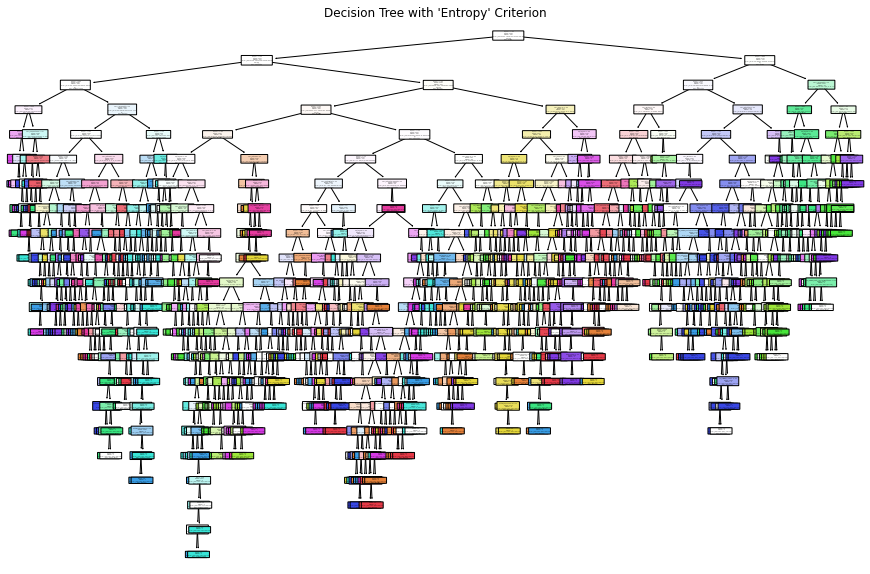

In [64]:
# Plot the Decision Tree with "entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, feature_names=X_encoded.columns, class_names=[str(cls) for cls in label_encoder.classes_], filled=True, rounded=True)
plt.title("Decision Tree with 'Entropy' Criterion")
plt.show()

In [17]:
# Generating classification report to get performance metrics
classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

print("Classification Report (Using 'Entropy' Criterion):")
print(classification_rep)


Classification Report (Using 'Entropy' Criterion):
                         precision    recall  f1-score   support

               Back Bay       0.84      0.77      0.80       176
            Beacon Hill       0.78      0.79      0.79       173
      Boston University       0.81      0.77      0.79       169
                 Fenway       0.77      0.81      0.79       167
     Financial District       0.90      0.85      0.87       165
       Haymarket Square       0.75      0.80      0.78       172
              North End       0.74      0.75      0.74       163
          North Station       0.85      0.87      0.86       153
Northeastern University       0.88      0.92      0.90       178
          South Station       0.83      0.81      0.82       144
       Theatre District       0.86      0.95      0.90       174
               West End       0.93      0.83      0.88       166

               accuracy                           0.83      2000
              macro avg       0.83   

In [18]:
# Handling missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [19]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier to the training data (with imputed values)
rf_classifier.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [26]:
# Calculate accuracy for training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision for training and test data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Calculate recall for training and test data
recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Calculate F1-score for training and test data
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Calculate AUROC for test data (requires probability scores)
y_test_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, y_test_prob, average='weighted', multi_class='ovr')

# Output the individual performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy on Training Data: {accuracy_train:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")
print(f"Precision on Training Data: {precision_train:.2f}")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Training Data: {recall_train:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")
print(f"F1-score on Training Data: {f1_score_train:.2f}")
print(f"F1-score on Test Data: {f1_score_test:.2f}")
print(f"AUROC on Test Data: {auroc_test:.2f}")


Performance Metrics:
Accuracy on Training Data: 0.92
Accuracy on Test Data: 0.83
Precision on Training Data: 0.92
Precision on Test Data: 0.83
Recall on Training Data: 0.92
Recall on Test Data: 0.83
F1-score on Training Data: 0.92
F1-score on Test Data: 0.83
AUROC on Test Data: 0.94


In [24]:
# Generating classification report to get performance metrics for Random Forest
classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

print(classification_rep)

                         precision    recall  f1-score   support

               Back Bay       0.84      0.77      0.80       176
            Beacon Hill       0.78      0.79      0.79       173
      Boston University       0.81      0.77      0.79       169
                 Fenway       0.77      0.81      0.79       167
     Financial District       0.90      0.85      0.87       165
       Haymarket Square       0.75      0.80      0.78       172
              North End       0.74      0.75      0.74       163
          North Station       0.85      0.87      0.86       153
Northeastern University       0.88      0.92      0.90       178
          South Station       0.83      0.81      0.82       144
       Theatre District       0.86      0.95      0.90       174
               West End       0.93      0.83      0.88       166

               accuracy                           0.83      2000
              macro avg       0.83      0.83      0.83      2000
           weighted avg